In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import lmpsetup
import hmdsetup

import lmp
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis

import scipy.constants as cnt

import shutil
import os
import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis as mda
import scipy
from matplotlib.lines import Line2D

from style_vars import *
plt.style.use('default')
plt.style.use('style.mplstyle')

hps_lines = [Line2D([0], [0], color='black', ls='--'),
                Line2D([0], [0], color='black')]

wt_d4_lines = [Line2D([0], [0], color=C_W),
                Line2D([0], [0], color=C_4)]

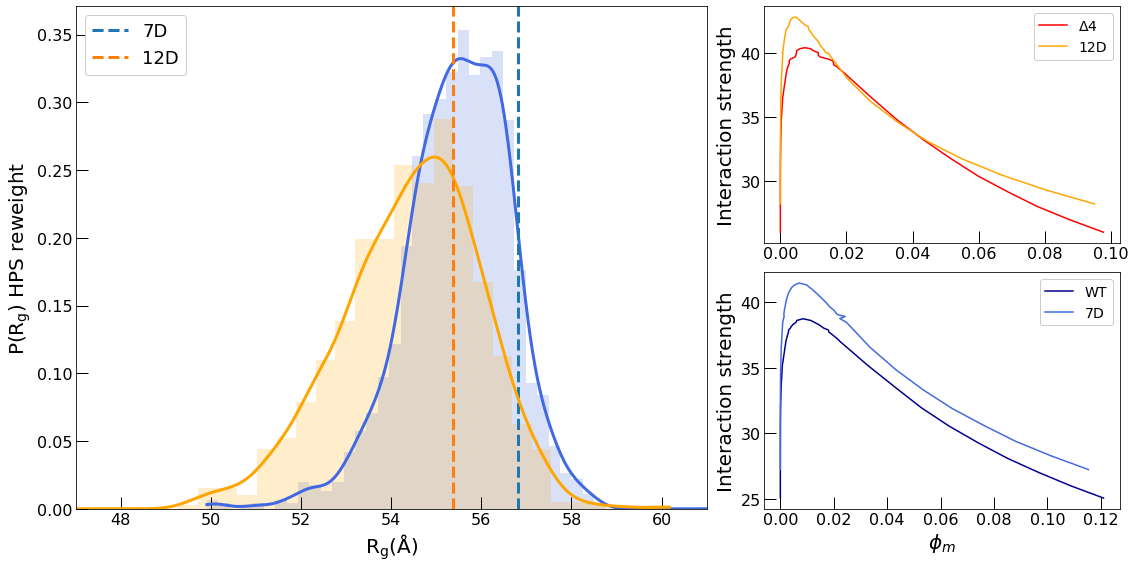

In [41]:
fig = plt.figure(figsize=(16, 8))

grid = plt.GridSpec(8, 8)
axs = plt.subplot(grid[:8, :5])
axs1 = plt.subplot(grid[:4, 5:])
axs2 = plt.subplot(grid[4:, 5:])
axs = [axs]

d7_rw_file = '/home/adria/p-test-7.txt'
d12_rw_file = '/home/adria/p-test-12.txt'
d7_rpa_file = '/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/c_only_p-test-7.txt'
d12_rpa_file = '/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/c_only_p-test-12.txt'

bins='auto'

d7rpa_crit = 1/np.genfromtxt(d7_rpa_file, max_rows=1)[1]
d12rpa_crit = 1/np.genfromtxt(d12_rpa_file, max_rows=1)[1]


d7data = np.genfromtxt(d7_rw_file)
rgi = d7data[0,2]

kde_scipy = scipy.stats.gaussian_kde(d7data[:,0])
x = np.linspace(d7data[:,0].min(), d7data[:,0].max(), 1000)
axs[0].plot(x, kde_scipy(x), color=C_7,  lw=3)

axs[0].hist(d7data[:,0], density=True, bins=bins, color=C_7, alpha=0.2,);
d7critline=axs[0].axvline(rgi, color='tab:blue', lw=3, ls='--')
# axs[0].set_title('7D', fontsize=20)
axs[0].set_ylabel('P($\mathrm{R_g}$) HPS reweight')
axs[0].set_xlabel('$\mathrm{R_g (\AA)}$')

d7data_rpa = np.genfromtxt(d7_rpa_file, skip_header=1)

# kde_scipy = scipy.stats.gaussian_kde(1/d7data_rpa[:,1])
# x = np.linspace(1/d7data_rpa[:,1].min(), 1/d7data_rpa[:,1].max(), 1000)
# axs[1][0].plot(x, kde_scipy(x), color=C_7,  lw=3)

# axs[1][0].hist(1/d7data_rpa[:,1], density=True, bins=bins, color=C_7, alpha=0.2,);
# axs[1][0].set_ylabel('P($T^*_c$) RPA')
# axs[1][0].axvline(d7rpa_crit, color='red')
# axs[1][0].set_xlabel('$\mathrm{T^*_c}$')


# axs[0][0].axvline(rgi, color='red')
d12data = np.genfromtxt(d12_rw_file)

kde_scipy = scipy.stats.gaussian_kde(d12data[:,0])
x = np.linspace(d12data[:,0].min(), d12data[:,0].max(), 1000)
axs[0].plot(x, kde_scipy(x), color=C_12,  lw=3)

rgi = d12data[0,2]
axs[0].hist(d12data[:,0], density=True, bins=bins, color=C_12, alpha=0.2,);
d12critline=axs[0].axvline(rgi, color='tab:orange', lw=3, ls='--')
# axs[0].set_title('12D', fontsize=20)
axs[0].set_xlabel('$\mathrm{R_g (\AA)}$')
axs[0].set_xlim(47,61)

axs[0].legend([d7critline, d12critline], ["7D", "12D"], loc='upper left')
# d12data_rpa = np.genfromtxt(d12_rpa_file, skip_header=1)

names = ['eps80']
titles = ["$ε_r=80$"]

for i in range(len(names)):
    d4 = np.genfromtxt(f'/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_d4_{names[i]}.txt')
    d12 = np.genfromtxt(f'/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_d12_{names[i]}.txt')
    axs1.plot(d4[:,0], 1/d4[:,1], color=C_4, label='$\Delta$4')
    axs1.plot(d12[:,0], 1/d12[:,1], color=C_12, label='12D')
    axs1.legend(fontsize=14)
#     axs1.set_xlabel("$\phi_m$")
    
#     axs[0].set_title(titles[i], fontsize=18)
axs1.set_ylabel("Interaction strength")

for i in range(len(names)):
    wt = np.genfromtxt(f'/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_wt_{names[i]}.txt')
    d7 = np.genfromtxt(f'/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/bi_d7_{names[i]}.txt')
    axs2.plot(wt[:,0], 1/wt[:,1], color=C_W, label='WT')
    axs2.plot(d7[:,0], 1/d7[:,1], color=C_7, label='7D')
    axs2.legend(fontsize=14)
    axs2.set_xlabel("$\phi_m$")
axs2.set_ylabel("Interaction strength")

# fig.tight_layout(w_pad=0.2)

# kde_scipy = scipy.stats.gaussian_kde(1/d12data_rpa[:,1])
# x = np.linspace(1/d12data_rpa[:,1].min(), 1/d12data_rpa[:,1].max(), 1000)
# axs[1][1].plot(x, kde_scipy(x), color=C_12,  lw=3)

# axs[1][1].hist(1/d12data_rpa[:,1], density=True, bins=bins, color=C_12, alpha=0.2,);
# axs[1][1].axvline(d12rpa_crit, color='red')
# axs[1][1].set_xlabel('$\mathrm{T^*_c}$')


fig.tight_layout()

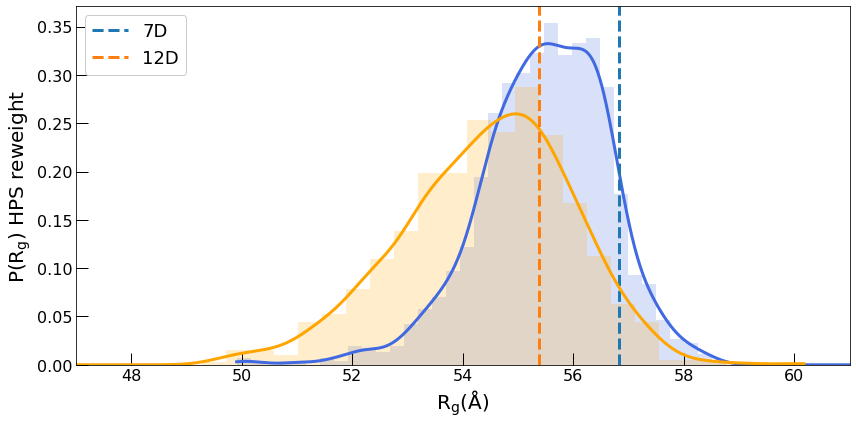

In [26]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
fig, axs = plt.subplots(figsize=(12,6))
axs = [axs]

d7_rw_file = '/home/adria/p-test-7.txt'
d12_rw_file = '/home/adria/p-test-12.txt'
d7_rpa_file = '/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/c_only_p-test-7.txt'
d12_rpa_file = '/home/adria/perdiux/prod/lammps/final/RPA/fg_ucst/c_only_p-test-12.txt'

bins='auto'

d7rpa_crit = 1/np.genfromtxt(d7_rpa_file, max_rows=1)[1]
d12rpa_crit = 1/np.genfromtxt(d12_rpa_file, max_rows=1)[1]


d7data = np.genfromtxt(d7_rw_file)
rgi = d7data[0,2]

kde_scipy = scipy.stats.gaussian_kde(d7data[:,0])
x = np.linspace(d7data[:,0].min(), d7data[:,0].max(), 1000)
axs[0].plot(x, kde_scipy(x), color=C_7,  lw=3)

axs[0].hist(d7data[:,0], density=True, bins=bins, color=C_7, alpha=0.2,);
d7critline=axs[0].axvline(rgi, color='tab:blue', lw=3, ls='--')
# axs[0].set_title('7D', fontsize=20)
axs[0].set_ylabel('P($\mathrm{R_g}$) HPS reweight')
axs[0].set_xlabel('$\mathrm{R_g (\AA)}$')

d7data_rpa = np.genfromtxt(d7_rpa_file, skip_header=1)

# kde_scipy = scipy.stats.gaussian_kde(1/d7data_rpa[:,1])
# x = np.linspace(1/d7data_rpa[:,1].min(), 1/d7data_rpa[:,1].max(), 1000)
# axs[1][0].plot(x, kde_scipy(x), color=C_7,  lw=3)

# axs[1][0].hist(1/d7data_rpa[:,1], density=True, bins=bins, color=C_7, alpha=0.2,);
# axs[1][0].set_ylabel('P($T^*_c$) RPA')
# axs[1][0].axvline(d7rpa_crit, color='red')
# axs[1][0].set_xlabel('$\mathrm{T^*_c}$')


# axs[0][0].axvline(rgi, color='red')
d12data = np.genfromtxt(d12_rw_file)

kde_scipy = scipy.stats.gaussian_kde(d12data[:,0])
x = np.linspace(d12data[:,0].min(), d12data[:,0].max(), 1000)
axs[0].plot(x, kde_scipy(x), color=C_12,  lw=3)

rgi = d12data[0,2]
axs[0].hist(d12data[:,0], density=True, bins=bins, color=C_12, alpha=0.2,);
d12critline=axs[0].axvline(rgi, color='tab:orange', lw=3, ls='--')
# axs[0].set_title('12D', fontsize=20)
axs[0].set_xlabel('$\mathrm{R_g (\AA)}$')
axs[0].set_xlim(47,61)

axs[0].legend([d7critline, d12critline], ["7D", "12D"], loc='upper left')
# d12data_rpa = np.genfromtxt(d12_rpa_file, skip_header=1)

# kde_scipy = scipy.stats.gaussian_kde(1/d12data_rpa[:,1])
# x = np.linspace(1/d12data_rpa[:,1].min(), 1/d12data_rpa[:,1].max(), 1000)
# axs[1][1].plot(x, kde_scipy(x), color=C_12,  lw=3)

# axs[1][1].hist(1/d12data_rpa[:,1], density=True, bins=bins, color=C_12, alpha=0.2,);
# axs[1][1].axvline(d12rpa_crit, color='red')
# axs[1][1].set_xlabel('$\mathrm{T^*_c}$')


fig.tight_layout()

~AA

In [9]:
d7_file = '/home/adria/p-test-7.txt'
d12_file = '/home/adria/p-test-12.txt'